In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from adjustText import adjust_text


In [25]:
rawData_deltaF = pd.read_csv("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/Randi_etal/Fig2a_deltaF_over_F.csv") #values are average across trials and animals (113 animals)
rawData_deltaF = rawData_deltaF.set_index(rawData_deltaF.columns[0])
rawData_alpha = pd.read_csv("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/Randi_etal/Fig2a_alpha(1-qvalue).csv") #values are average across trials and animals (113 animals)
rawData_alpha = rawData_alpha.set_index(rawData_alpha.columns[0])

### Make a plot that shows correlation between ASJ (one for L and one for right) with other neurons, when stimulated and when responding, with alpha on x-axis and deltaF/F on y-axis (so 4 plots total) ###

In [51]:
# Make a dataframe for the data
# print(rawData_deltaF.head())
# not entirley sure if rows or columns indicate if neuron was stimulated or is responding.......
rawdata_deltaF_ASJL_stimulated = rawData_deltaF['ASJL']
rawdata_alpha_ASJL_stimulated = rawData_alpha['ASJL']
rawdata_deltaF_ASJR_stimulated = rawData_deltaF['ASJR']
rawdata_alpha_ASJR_stimulated = rawData_alpha['ASJR']
rawdata_deltaF_ASJL_responding = rawData_deltaF.T['ASJL'] #first transpose the data so that the responding neuron names are the columns
rawdata_alpha_ASJL_responding = rawData_alpha.T['ASJL'] 
rawdata_deltaF_ASJR_responding = rawData_deltaF.T['ASJR'] 
rawdata_alpha_ASJR_responding = rawData_alpha.T['ASJR']
print(len(rawdata_deltaF_ASJL_stimulated)) #168 neurons

print(rawdata_deltaF_ASJL_stimulated[0:4])
print(rawdata_deltaF_ASJL_responding[0:4])


# Rows and columns are neuron names and values are deltaF/F or alpha values for between neurons

168
Unnamed: 0
ADEL    0.066157
ADER    0.069101
ADFL    0.026345
ADLL    0.064681
Name: ASJL, dtype: float64
ADEL    0.014986
ADER   -0.090489
ADFL    0.015651
ADLL    0.109943
Name: ASJL, dtype: float64


/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_76162/1394880591.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[labeled][i], y[labeled][i] + 0.025))


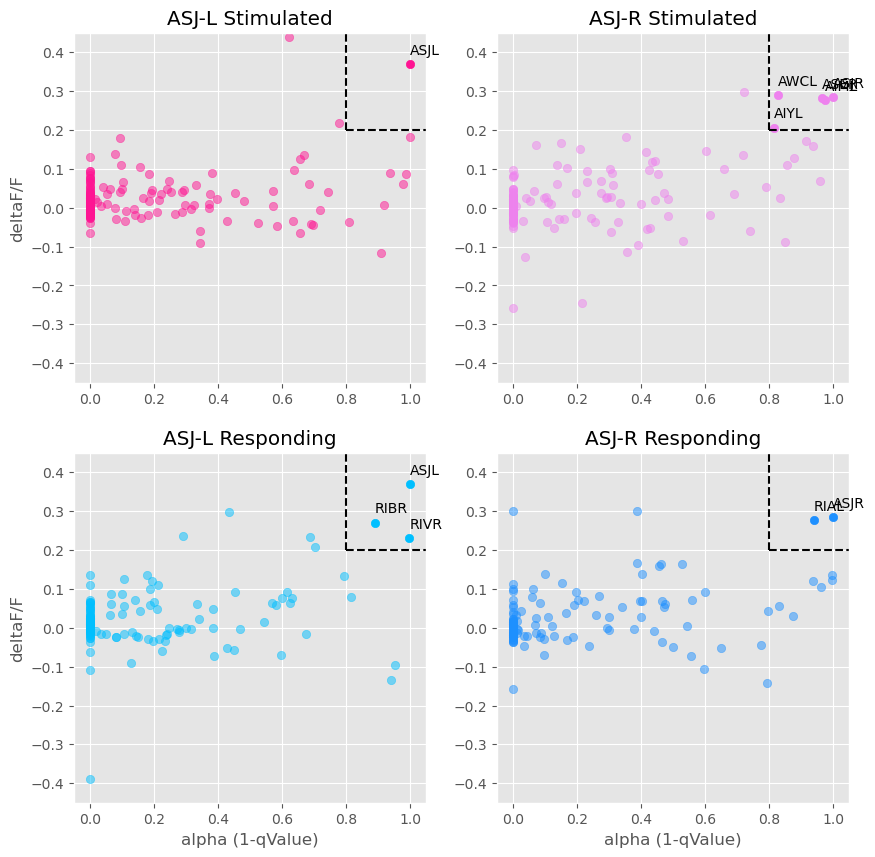

In [69]:
# # Plotting

# # Plot 1: ASJL stimulated vs. other neurons responding
# # Plot 2: ASJR stimulated vs. other neurons responding
# # Plot 3: ASJL responding vs. other neurons stimulated
# # Plot 4: ASJR responding vs. other neurons stimulated

# plt.style.use("ggplot") #to have plot look more like ggplot2 in R

# def label_points(x, y, ax):
#     for i, txt in enumerate(x.index):
#         if x[i] > 0.8 and y[i] > 0.2:
#             ax.annotate(txt, (x[i], y[i] + 0.025))

# # def label_points(x, y, ax):
# #     texts = []
# #     for i, txt in enumerate(x.index):
# #         if x[i] > 0.8 and y[i] > 0.2:
# #             texts.append(ax.text(x[i], y[i] + 0.06, txt))
# #     adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='red'))

# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# ax1 = axs[0, 0]
# ax2 = axs[0,1]
# ax3 = axs[1,0]
# ax4 = axs[1,1]

# ax1.scatter(rawdata_alpha_ASJL_stimulated, rawdata_deltaF_ASJL_stimulated, color = 'deeppink', label = 'n = 168 neurons')
# label_points(rawdata_alpha_ASJL_stimulated, rawdata_deltaF_ASJL_stimulated, ax1)
# ax1.set_title('ASJ-L Stimulated')
# ax1.set_ylabel('deltaF/F')
# ax1.set_ylim(-0.45,0.45)
# ax1.set_xlim(-0.05,1.05)
# ax1.vlines(0.8, 0.2, 0.45, color = 'black', linestyle = 'dashed')
# ax1.hlines(0.2, 0.8, 1.05, color = 'black', linestyle = 'dashed')
# ax1.legend(loc = 'lower right', facecolor = 'white')

# ax2.scatter(rawdata_alpha_ASJR_stimulated, rawdata_deltaF_ASJR_stimulated, color = 'violet', label = 'n = 168 neurons')
# label_points(rawdata_alpha_ASJR_stimulated, rawdata_deltaF_ASJR_stimulated, ax2)
# ax2.set_title('ASJ-R Stimulated')
# ax2.set_ylim(-0.45,0.45)
# ax2.set_xlim(-0.05,1.05)
# ax2.vlines(0.8, 0.2, 0.45, color = 'black', linestyle = 'dashed')
# ax2.hlines(0.2, 0.8, 1.05, color = 'black', linestyle = 'dashed')
# ax2.legend(loc = 'lower right', facecolor = 'white')


# ax3.scatter(rawdata_alpha_ASJL_responding, rawdata_deltaF_ASJL_responding, color = 'deepskyblue', label = 'n = 168 neurons')
# label_points(rawdata_alpha_ASJL_responding, rawdata_deltaF_ASJL_responding, ax3)
# ax3.set_title('ASJ-L Responding')
# ax3.set_xlabel('alpha (1-qValue)')
# ax3.set_ylabel('deltaF/F')
# ax3.set_ylim(-0.45,0.45)
# ax3.set_xlim(-0.05,1.05)
# ax3.vlines(0.8, 0.2, 0.45, color = 'black', linestyle = 'dashed')
# ax3.hlines(0.2, 0.8, 1.05, color = 'black', linestyle = 'dashed')
# ax3.legend(loc = 'lower right', facecolor = 'white')


# ax4.scatter(rawdata_alpha_ASJR_responding, rawdata_deltaF_ASJR_responding, color = 'dodgerblue', label = 'n = 168 neurons')
# label_points(rawdata_alpha_ASJR_responding, rawdata_deltaF_ASJR_responding, ax4)
# ax4.set_title('ASJ-R Responding')
# ax4.set_xlabel('alpha (1-qValue)')
# ax4.set_ylim(-0.45,0.45)
# ax4.set_xlim(-0.05,1.05)
# ax4.vlines(0.8, 0.2, 0.45, color = 'black', linestyle = 'dashed')
# x_min, x_max = ax4.get_xlim()
# ax4.hlines(0.2, 0.8, 1.05, color = 'black', linestyle = 'dashed')
# ax4.legend(loc = 'lower right', facecolor = 'white')

# fig.savefig("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/RanditEtal_ASJ_stimulated.png", dpi = 900)


plt.style.use("ggplot")

def label_points(x, y, ax):
    labeled = (x > 0.8) & (y > 0.2)
    for i, txt in enumerate(x[labeled].index):
        ax.annotate(txt, (x[labeled][i], y[labeled][i] + 0.025))
    return labeled

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4 = axs.flatten()

for ax, alpha, deltaF, color, title in zip(
    [ax1, ax2, ax3, ax4],
    [rawdata_alpha_ASJL_stimulated, rawdata_alpha_ASJR_stimulated, rawdata_alpha_ASJL_responding, rawdata_alpha_ASJR_responding],
    [rawdata_deltaF_ASJL_stimulated, rawdata_deltaF_ASJR_stimulated, rawdata_deltaF_ASJL_responding, rawdata_deltaF_ASJR_responding],
    ['deeppink', 'violet', 'deepskyblue', 'dodgerblue'],
    ['ASJ-L Stimulated', 'ASJ-R Stimulated', 'ASJ-L Responding', 'ASJ-R Responding']
):
    labeled = label_points(alpha, deltaF, ax)
    ax.scatter(alpha[~labeled], deltaF[~labeled], color=color, alpha=0.5)
    ax.scatter(alpha[labeled], deltaF[labeled], color=color)
    ax.set_title(title)
    ax.set_ylim(-0.45, 0.45)
    ax.set_xlim(-0.05, 1.05)
    ax.vlines(0.8, 0.2, 0.45, color='black', linestyle='dashed')
    ax.hlines(0.2, 0.8, 1.05, color='black', linestyle='dashed')

ax3.set_xlabel('alpha (1-qValue)')
ax4.set_xlabel('alpha (1-qValue)')
ax1.set_ylabel('deltaF/F')
ax3.set_ylabel('deltaF/F')

fig.savefig("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/RanditEtal_ASJ_stimulated.png", dpi=900)

In [66]:
rawdata_deltaF_AIBL_stimulated = rawData_deltaF['AIBL']
rawdata_alpha_AIBL_stimulated = rawData_alpha['AIBL']
rawdata_deltaF_AIBR_stimulated = rawData_deltaF['AIBR']
rawdata_alpha_AIBR_stimulated = rawData_alpha['AIBR']
rawdata_deltaF_AIBL_responding = rawData_deltaF.T['AIBL'] #first transpose the data so that the responding neuron names are the columns
rawdata_alpha_AIBL_responding = rawData_alpha.T['AIBL'] 
rawdata_deltaF_AIBR_responding = rawData_deltaF.T['AIBR'] 
rawdata_alpha_AIBR_responding = rawData_alpha.T['AIBR']

/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_76162/222237313.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (y[i] > 0.1 or y[i] < -0.1):
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_76162/222237313.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i] - deviation))


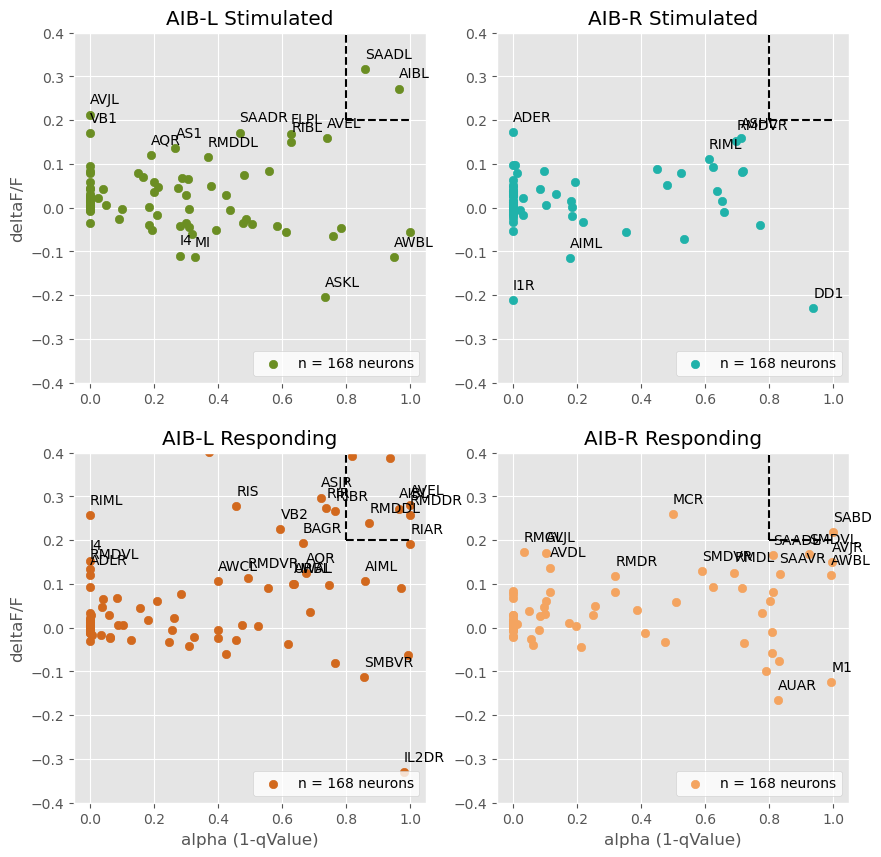

In [54]:
plt.style.use("ggplot") #to have plot look more like ggplot2 in R

def label_points(x, y, ax, deviation):
    for i, txt in enumerate(x.index):
        if (y[i] > 0.1 or y[i] < -0.1):
            ax.annotate(txt, (x[i], y[i] - deviation))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
ax1 = axs[0, 0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]

ax1.scatter(rawdata_alpha_AIBL_stimulated, rawdata_deltaF_AIBL_stimulated, color = 'olivedrab', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBL_stimulated, rawdata_deltaF_AIBL_stimulated, ax1, -0.025)
ax1.set_title('AIB-L Stimulated')
ax1.set_ylabel('deltaF/F')
ax1.set_ylim(-0.4,0.4)
ax1.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax1.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax1.legend(loc = 'lower right', facecolor = 'white')

ax2.scatter(rawdata_alpha_AIBR_stimulated, rawdata_deltaF_AIBR_stimulated, color = 'lightseagreen', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBR_stimulated, rawdata_deltaF_AIBR_stimulated, ax2, -0.025)
ax2.set_title('AIB-R Stimulated')
ax2.set_ylim(-0.4,0.4)
ax2.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax2.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax2.legend(loc = 'lower right', facecolor = 'white')


ax3.scatter(rawdata_alpha_AIBL_responding, rawdata_deltaF_AIBL_responding, color = 'chocolate', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBL_responding, rawdata_deltaF_AIBL_responding, ax3, -0.025)
ax3.set_title('AIB-L Responding')
ax3.set_xlabel('alpha (1-qValue)')
ax3.set_ylabel('deltaF/F')
ax3.set_ylim(-0.4,0.4)
ax3.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
ax3.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax3.legend(loc = 'lower right', facecolor = 'white')


ax4.scatter(rawdata_alpha_AIBR_responding, rawdata_deltaF_AIBR_responding, color = 'sandybrown', label = 'n = 168 neurons')
label_points(rawdata_alpha_AIBR_responding, rawdata_deltaF_AIBR_responding, ax4, -0.025)
ax4.set_title('AIB-R Responding')
ax4.set_xlabel('alpha (1-qValue)')
ax4.set_ylim(-0.4,0.4)
ax4.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
x_min, x_max = ax4.get_xlim()
ax4.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
ax4.legend(loc = 'lower right', facecolor = 'white')


# fig.savefig("", dpi = 90)

164


/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_76162/627333725.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (y[i] > 0.1 or y[i] < -0.1):
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_76162/627333725.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (x[i], y[i] - deviation))


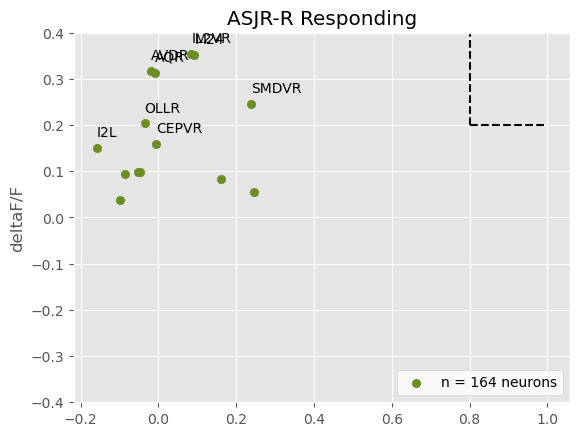

In [61]:
## Now in UNC-31 mutant background ##
unc31_rawData_deltaF = pd.read_csv("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/Randi_etal/Fig7_deltaF_over_F_unc31Background.csv") #values are average across trials and animals (113 animals)
unc31_rawData_deltaF = unc31_rawData_deltaF.set_index(unc31_rawData_deltaF.columns[0])
#print(unc31_rawData_deltaF[110:130])
unc_31rawData_alpha = pd.read_csv("/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/Randi_etal/Fig7_alpha(1-qvalue)_unc31Background.csv") #values are average across trials and animals (113 animals)
unc31_rawData_alpha = unc_31rawData_alpha.set_index(unc_31rawData_alpha.columns[0])

unc31_rawdata_deltaF_ASJR_responding = unc31_rawData_deltaF.T['ASJR'] 
unc31_rawdata_alpha_ASJR_responding = unc31_rawData_alpha.T['ASJR']
print(len(unc31_rawData_alpha)) #164 neurons

plt.style.use("ggplot") #to have plot look more like ggplot2 in R

def label_points(x, y, ax, deviation):
    for i, txt in enumerate(x.index):
        if (y[i] > 0.1 or y[i] < -0.1):
            ax.annotate(txt, (x[i], y[i] - deviation))

plt.scatter(unc31_rawdata_deltaF_ASJR_responding, unc31_rawdata_alpha_ASJR_responding, color = 'olivedrab', label = 'n = 164 neurons')
label_points(unc31_rawdata_deltaF_ASJR_responding, unc31_rawdata_alpha_ASJR_responding, plt, -0.025)
plt.title('ASJ-R Responding')
plt.ylabel('deltaF/F')
plt.ylim(-0.4,0.4)
plt.vlines(0.8, 0.2, 0.4, color = 'black', linestyle = 'dashed')
plt.hlines(0.2, 0.8, 1, color = 'black', linestyle = 'dashed')
plt.legend(loc = 'lower right', facecolor = 'white')